# JSC270S - Tutorial \#3 : Design, Conduct and Analyse a Survey

## Profs. F. Chevalier and N. Taback


## Date: January 30, 2019
## Time: 12:00 - 14:00
## Location: BA 3175


****
## Instructions

- This tutorial comprises two parts. <font color='blue'>**In the first part, you will work with a tutorial partner. The second part is individual.**</font>

- Make a copy of this notebook.

- The notebook should be named: jsc270_tut3_answers_lastname_studentnumber, where "lastname" is your last name, and "studentnumber" is your UofT student number. <font color='blue'>**While you will work in pairs during the tutorial, both of your team members should commit the same notebook in their Github classroom repositority separately.**.</font>

- Answer the questions in the cells that indicate where your answers should be placed. Leave the initial comment in the code cell and heading (indicated by `# Answer for qustion XX`).  For example, place your answer for Question 1 in the markdown cell with comment `# Enter your answer for Question 1 into this cell` (remember not to delete this comment).

- Make sure that you explain your solutions when asked and comment your code. 

- Commit and push changes to the Github classroom repository that has been provided (more details below).


### What should be submitted?

- One *Jupyter notebook* using Python that contains all the data analyses. Make sure to comment your code in the code cells.

- Additional files that your notebook requires to compile properly (e.g. a data file).

- <font color='blue'>**csv file(s) with participants' answers to your survey**</font>

- A pdf of your Jupyter notebook exported as a pdf file.  This can be done using [`nbconvert`](https://nbconvert.readthedocs.io/en/latest/install.html).


### When should it be submitted?

- **At the end of the tutorial (in-lab tutorial assignment)**: Commit and push your notebook to the Github classroom repository that contains your answers (i.e., the file named: jsc270_tut1_answers_lastname_studentnumber.ipynb) before 14:10 on the day of the tutorial, January 30. <font color='blue'>**Each group member should submit the group notebook separately.** Make sure you also commit and push all of the **csv file(s) with participants' answers to your survey**.</font>

- [`nbdime`](https://nbdime.readthedocs.io/en/latest/) is a Python package that allows you (and the teaching team) to see the changes you have made to your assignment. 

- **Homework (tutorial assignment completion)**: Push your completed tutorial by 11:30, Monday, February 4.  Your last commit closest to 11:30 will be considered your final assignment.

### Where should the assignment be submitted?

Push your finished notebook and any other files on Github, through the following link: https://classroom.github.com/a/auWRMyAC

Upload the pdf of your answer notebook to the JSC270 course page on Quercus.

***

## Tutorial Grading

Tutorials will be graded according to the following marking scheme.

<table>
  <tr>
    <th></th>
    <th>Marks</th>
  </tr>
  <tr>
    <td>Tutorial Participation</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Attendance for entire tutorial</td>
    <td>5</td>
  </tr>
  <tr>
    <td>In-lab tutorial assignment</td>
    <td>20</td>
  </tr>
  <tr>
    <td>Tutorial assignment completion</td>
    <td>20</td>
  </tr>
</table>


### Grading Rubric for Tutorial Assignments

Tutorial grading rubric is available [here](https://jsc270.github.io/tut_docs.html#tutorial_grading).


***

## Tutorial objectives
The goal of this tutorial is to design and conduct a survey, then analyse the results.


****

## Widgets in python using ipywidgets


The [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) library supports the definition of widgets to interactively prompt input from the user. You will use such widgets to design a simple fillable form in python.

You can install the library using `pip` or `conda`:
```python
    # using pip
    !pip install ipywidgets
    
    # using conda
    !conda install -c conda-forge ipywidgets
```    

Below, we illustrate how to use `ipywidgets` with an example of a simple form that we designed for people to order meals. Note that nbconvert will not render the widgets in your pdf.

In [133]:
import ipywidgets as widgets                 ## widget library
from IPython.display import display          ## to display the widgets
import re                                    ## library for using regular expressions


##### Survey: Food order #####

## Text field widget to prompt for contact name 
name = widgets.Text(
    value='<put the contact name here>',
    placeholder='',
    description='Name:',
    disabled=False
)

## Input validation for participant name 
## we use a regular expression to verify that the entered text in this field doesn't contain special characters
## Returns True if text appears valid, else print error and returns false
def validate_name(name):
    if not re.match("^[a-zA-Z]*$", name):
        print("Error: There are special characters in your name.")
        return False
    return True


## Integer value widget to prompt for guests number
## the min (and default) value is set to 1 (i.e. the participant)
nb = widgets.BoundedIntText(
    value=1,
    min=1,
    max=5,
    step=1,
    description='Guests:'
)


## Radio button widget to prompt for a single choice of meal 
meal = widgets.RadioButtons(
    options=['breakfast', 'lunch', 'dinner'],
    description='Time:'
)

## 5-points likert scale to prompt for promotional offers
chef = widgets.ToggleButtons(
    options=['very interested', 'somewhat interested', 'neutral', 'somewhat uninterested', 'not interested at all'],
    button_style=''
)


## Two checkboxes widgets to prompt for dietery restrictions
vegetarian = widgets.Checkbox(
    value=False,
    description='Vegetarian'
)

allergy = widgets.Checkbox(
    value=False,
    description='Allergy (peanuts, gluten, ...)'
)


## Validation button 
### Validation of data
validate = widgets.Button(
    description='Validate',
    disabled=False,
    button_style='info'   ## blue design
)


## Function to call when clicking "validate" button
def on_button_clicked(b):
    if (validate_name(name.value)):      ## check if the input data is valid
        confirm()                        ## if successful confirm order
    
def confirm():
    ## <this is where you would put some python code to save the data in a file or database>
    
    print('Thank you for your order. \n We took record of your reservation request for', 
           nb.value, 'guests for', time.value, 
          'under the name of', name.value)
    if allergy.value: 
        print ('Food allergy.')
    if vegetarian.value: 
        print ('Vegetarian meal.')

## Specify the function to call upon click even on the validate button 
validate.on_click(on_button_clicked)

   
    
## This class is used to format text when calling print
class font:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


### Create the form
print(font.UNDERLINE, '** YOUR MEAL ORDER **', font.END,'\n')
print(font.BOLD, 'Party details', font.END)
display(name)
display(nb)
print(font.BOLD, 'When would you like to come?', font.END)
display(meal)
print(font.BOLD, 'How interested are you in hearing about the chef\'s recommendations?', font.END)
display(chef)
print(font.BOLD, 'Do you have any dietary restriction?', font.END)
display(vegetarian, allergy)
display(validate)

 ** YOUR MEAL ORDER **  

 Party details 


Text(value='<put the contact name here>', description='Name:', placeholder='')

BoundedIntText(value=1, description='Guests:', max=5, min=1)

 When would you like to come? 


RadioButtons(description='Time:', options=('breakfast', 'lunch', 'dinner'), value='breakfast')

 How interested are you in hearing about the chef's recommendations? 


ToggleButtons(options=('very interested', 'somewhat interested', 'neutral', 'somewhat uninterested', 'not inte…

 Do you have any dietary restriction? 


Checkbox(value=False, description='Vegetarian')

Checkbox(value=False, description='Allergy (peanuts, gluten, ...)')

Button(button_style='info', description='Validate', style=ButtonStyle())

***
# A survey to learn about students taking JSC270

We are interested in learning about the students taking the JSC270 course. In this tutorial, we ask you to help us design a survey.

In part 1 of the tutorial, you will work in pairs, to design and implement a fillable form to administer the survey, then take your own survey, as well as another group's. In part 2 of the tutorial, you will work individually, to combine and analyze the data collected from all groups.

We are interested in learning the following information:

* Participant ID (assigned at the beginning of the tutorial)
* Demographic data:
    * semester born: (Fall-Winter (January - June) or Spring-Summer (July - December))
    
* Astrological sign?
     * Aquarius
     * Pisces
     * etc ...   
     
* Among the following list: pizza, pasta, tacos, chicken curry, steak and French fries (steak frites), steamed vegetable dumplings, steamed pork dumplings, ramen noodle soup 
    * most favourite dish (up to three) and why?
    * least favourite dish (up to three) and why?

* Which genre of movies do you enjoy?  (Examples could be comedy movies, drama movies, horror movies, etc ...)
* How often do you go to the movie theater?
* Which genre of music do you enjoy? (Examples could be: classical music, pop music, jazz, etc ...)

* Reaction time: reaction time to the [online test](https://www.humanbenchmark.com/tests/reactiontime)

* Did you eat a candy less within 10min before taking the reaction time test?
***


## Part I:  Design and conduct a survey (group work)

In this part of the tutorial, you will work in pairs. Choose a partner to work with on Questions 1-5.


## Question 1

Together with your tutorial partner, decide on the phrasing of each question and associated type of input (i.e. what widget) you will use for collecting information. Explain briefly your choices.

## Answer for Question 1

- ParticipantID: use BoundedIntBox, because the ID is an integer between 1 and 12
- Demographic: use Toggle Buttons, because we have to choose one answer from 2 options.
- Astrological sign: use radio Buttons, because we have to choose one answer from 12 options
- Food: use check boxes allowing choosing multiple options. Use text input for reasons. 
- Genre of movies: use check boxes, because one person may like multiple genres, and there are a limited number of genres.
- How often do you go to the movie theater: use Toggle Buttons, because we have to choose one answer among a limited number of options
- Genre of music: use check boxes, because one person may like multiple genres, and there are a limited number of genres.
- Reaction time: use BoundedIntBox, because the reaction time is an positive integer
- Did you did a candy: use toggle buttons, because we have to choose one answer from 2 options.


## Question 2

Together with your tutorial partner, discuss what tests you can run on the input data to prevent the user from entering corrupt or invalid data. Explain where and why you would add such tests in a few words.

## Answer for Question 2

- ID: int between 1 and 12
- For music genre, movie genre, make sure the user selected at most 3 options. Since we don't want the user to pick too many genres
- Reaction time: integer greater than 0
- Make sure their favourite dishes do not appear in the least favourite dishes, and check the maximum number of chosen options is no more than three. 

## Question 3

Write the python code to create the fillable form you designed above, including input validation methods. 

When validating the answers, if the participant's input is valid, your code should save their answers into a csv file named jsc270_survey_lastname1_lastname2_participantID, where "lastname1" and "lastname2" are the lastname of your two group members, and participant ID is the ID the participant entered in the form.

In [134]:
## Write the code for question 3 here

import csv
from ipywidgets import VBox

class font:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def on_button_clicked(b):
    leastCon = [check.value for check in leastGroup]
    mostCon = [check.value for check in mostGroup]
    movCon = [mov_genre[i] for i in range(len(mov_genre)) if mov_group[i].value]
    musCon = [mus_genre[i] for i in range(len(mus_genre)) if mus_group[i].value]

    if sum(mostCon) > 3:
        print("You can't like over 3 dishes")
        return
    elif sum(leastCon) > 3:
        print("You can't hate over 3 dishes")
        return
    elif len(movCon) > 3 or len(musCon) > 3:
        print("You can't choose over 3 genres")
        return
    elif sum([leastCon[i] and mostCon[i] for i in range(len(leastCon))]) > 0:
        print("You can't like and hate a dish at the same time.")
        return
    
    least_list = [food_list[i] for i in range(len(food_list)) if leastCon[i]]
    most_list = [food_list[i] for i in range(len(food_list)) if mostCon[i]]
    newline = [str(id.value),
               dem.value,
               ast.value,
               '|'.join(movCon),
               often_mov.value, 
               '|'.join(musCon),
               r_t.value,
               candy.value,
               '|'.join(most_list),
               '|'.join(least_list)]
    
    with open('jsc270_survey_li_li_yan_'+str(id.value)+'.csv','w') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(newline)
    print('Thanks for your respond')
    return

# ID
id = widgets.BoundedIntText(
    min=1,
    max=12,
    step=1,
    description='ParticipantID:'
)

# demographic
ast = widgets.RadioButtons(
    options= ['Aries(March 21 - April 19)',
              'Taurus (April 20 - May 20)',
              'Gemini (May 21 - June 20)',
              'Cancer (June 21 - July 22)',
              'Leo (July 23 - August 22)',
              'Virgo (August 23 - September 22)',
              'Libra (September 23 - October 22)',
              'Scorpio (October 23 - November 21)',
              'Sagittarius (November 22 - December 21)',
              'Capricorn (December 22 - January 19)',
              'Aquarius (January 20 - February 18)',
              'Pisces (February 19 - March 20)'],
)

# Astrological sign
dem = widgets.ToggleButtons(
    options=['Jan-June', 'July-Dec'],
    button_style=''
)

# food 
food_list = ('pizza, pasta, tacos, chicken curry, steak and French fries (steak frites),' + \
' steamed vegetable dumplings, steamed pork dumplings, ramen noodle soup').split(", ")
leastGroup = [widgets.Checkbox(description=food) for food in food_list]
mostGroup = [widgets.Checkbox(description=food) for food in food_list]

# candy
candy = widgets.ToggleButtons(
    options=['YES', 'NO'],
    button_style=''
)

# validation
validate = widgets.Button(
    description='Validate and Confirm',
    disabled=False,
    button_style='info',
)
validate.on_click(on_button_clicked)

# movie genre
mov_genre = ['Comedy', 'Action', 'Adventure', 
             'Crime & Gangster', 'Drama', 'Horror',
             'Musicals/Dance', 'Science Fiction', 
             'Animation', 'Others']
mov_group = [widgets.Checkbox(description=g) for g in mov_genre]

# movie often
often_mov = widgets.ToggleButtons(
    options=['> once a week', 'once a week', '2-3 times/month', 'once a month',
             '2-3 times/year', '< 2-3 times/year', 'Never been there'],
    button_style=''
)

# music genre
mus_genre = ['Classical', 'Pop', 'Hip hop', 
             'Blues', 'Jazz', 'Rock',
             'Country', 'Funk', 'Others']
mus_group = [widgets.Checkbox(description=g) for g in mus_genre]

# reaction time
r_t = widgets.BoundedIntText(
    value=1,
    min=0,
    max=100000,
    description='Time (ms): '
)


# display
print(font.BOLD,'Your Participant ID')
display(id)

print(font.BOLD, 'Semester born')
display(dem)

print(font.BOLD, 'Your Astrological sign')
display(ast)

print(font.BOLD, 'Choose your most favorite dish (at most 3)', font.END)
display(VBox(mostGroup))
print(font.BOLD, 'Choose your least favorite dishes (at most 3)', font.END)
display(VBox(leastGroup))

print(font.BOLD, 'Which genres of movies do you enjoy (at most 3)', font.END)
display(VBox(mov_group))

print(font.BOLD, 'How often do you go to the movie theater', font.END)
display(often_mov)

print(font.BOLD, 'Which genres of music do you enjoy (at most 3)', font.END)
display(VBox(mus_group))

print(font.BOLD, 'Reaction time to the online test', font.END)
display(r_t)

print(font.BOLD,'Did you eat a candy less within 10min before taking the reaction time test?')
display(candy)

display(validate)

 Your Participant ID


BoundedIntText(value=1, description='ParticipantID:', max=12, min=1)

 Semester born


ToggleButtons(options=('Jan-June', 'July-Dec'), value='Jan-June')

 Your Astrological sign


RadioButtons(options=('Aries(March 21 - April 19)', 'Taurus (April 20 - May 20)', 'Gemini (May 21 - June 20)',…

 Choose your most favorite dish (at most 3) 


 Choose your least favorite dishes (at most 3) 


 Which genres of movies do you enjoy (at most 3) 


 How often do you go to the movie theater 


ToggleButtons(options=('> once a week', 'once a week', '2-3 times/month', 'once a month', '2-3 times/year', '<…

 Which genres of music do you enjoy (at most 3) 


 Reaction time to the online test 


BoundedIntText(value=1, description='Time (ms): ', max=100000)

 Did you eat a candy less within 10min before taking the reaction time test?


ToggleButtons(options=('YES', 'NO'), value='YES')

Button(button_style='info', description='Validate and Confirm', style=ButtonStyle())

## Question 4
Take your own survey and save the data in a csv file. In the cell below, document the data collection method (i.e. specification of the data file) for a third party to understand the context and limitations of the data.


## Answer for Question 4

- Each data cell is separated by ","
- The stored data is: participantID, semester born, astrological sign, most favorite food, least favorite food, reason, movie genres, frequency of movie watching, music genres, response time, did you each candy before the response time test.
- For favorite food, least favorite food, movie genres, music genres, each food or genre is separated by "|"

## Question 5

Take your neighbour's survey. While taking the other group's survey, take note of the differences in the way the other group designed their survey compared to your group. Comment on the pros and cons of the different ways of collecting the same pieces of information. (It is possible that their are no differences).

## Answer for Question 5

- One group uses a slide bar for the frequency of movie watching. It's more intuitive to use a slide bar for frequency related questions.
- One group uses text input for favorite movie genre and music genre. It gives more freedom in choosing the favorite genres. However, the collected data is harder to analyze. 
- One group uses 3 drop down widgets for choosing favorite food. It easily limits the maximum number of choices, while it will take longer time to choose.


***

# Part II: Analyze the data (individual work)

In this part of the tutorial, you will work individually. We will send everyone the data files generated during the tutorial. 

## Question 6

Combine and reconcile the different files into a single uniform data frame containing all of the collected information. 

In [135]:
### Write the code for Question 6 below
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def clean_li(df, fileName):
    if sum([i in fileName for i in ['8', '9']]) != 0:
        df[10] = np.nan
        df[11] = np.nan
        df = df[[0, 1, 2, 8, 10, 9, 11, 3, 4, 5, 6, 7]]
    else:
        df[11] = np.nan
        if '3' in fileName:
            df = df[[0, 1, 2, 8, 11, 10, 9, 3, 4, 5, 6, 7]]
        else:
            df = df[[0, 1, 2, 3, 11, 4, 5, 6, 7, 8, 9, 10]]
    for i in [3, 5, 7, 9]:
        try:
            df.iat[0, i] = str(df.iat[0, i]).split("|")
        except ValueError:
            df.iat[0, i] = np.nan
    df.columns = ['pid', 'semester', 'ast', 
                  'favorite food', 'reason like', 'least favorite food', 'reason dislike',
                  'movie genres', 'theater vist', 'music genres', 'reaction time', 
                  'candy']
    return df

fileNames = os.listdir('data/')

data = pd.DataFrame()
for name in fileNames: 
    if 'Goldstein_Wang' in name:
        df = pd.read_csv('data/' + name, header=0, delimiter='\t')
        df.iat[0, 2] = df.iat[0, 2][: df.iat[0, 2].index(' (')]
        for i in [3, 5, 7, 9]:
            df.iat[0,i] = df.iat[0, i][1: -1].replace("'", "").split(", ")
        df.columns = ['pid', 'semester', 'ast', 'favorite food', 'reason like', 'least favorite food', 'reason dislike',
                      'movie genres', 'theater vist', 'music genres', 'reaction time', 'candy']
    elif 'huang_huang' in name:
        df = pd.read_csv('data/' + name, header=0, delimiter=',')
        df.iat[0,1] = df.iat[0, 1][df.iat[0,1].index('(') + 1: -1]
        for i in [3, 5, 9]:
            string = df.iat[0, i][1: -2].replace("'",'')
            df.iat[0,i] = string.split(',')
        movie_genre = 'Comedy, Drama, Horror, Action, Crime, Romance, Other'.split(', ')
        df.iat[0, 7] = [movie_genre[i] for i in range(len(movie_genre)) if df.iat[0, 7][1:-1].split(', ')[i]=='True']
        df.columns = ['pid', 'semester', 'ast', 
                      'favorite food', 'reason like', 'least favorite food', 'reason dislike',
                      'movie genres', 'theater vist', 'music genres', 'reaction time', 
                      'candy']
    elif 'li_li_yan' in name:
        df = pd.read_csv('data/' + name, header=None, delimiter=',')
        df = clean_li(df, name)
    else:
        df = pd.read_csv('data/' + name, header=0, delimiter=',')
        df['favorite food'] = [[i for i in df.iloc[0, [4, 5, 6]] if i != 'not among them']]
        df['least favorite food'] = [[i for i in df.iloc[0, [8, 9, 10]] if i != 'not among them']]
        df = df.drop([df.columns[i] for i in [0,4,5,6,8,9,10]], axis=1)
        df.columns = ['pid', 'semester', 'ast', 'reason like', 'reason dislike',
                      'movie genres', 'theater vist', 'music genres', 'reaction time', 
                      'candy', 'favorite food', 'least favorite food']
        df['pid'] = df['pid'].astype(int)
        try:
            df.iat[0, 5] = [df.iat[0, 5]]
        except ValueError:
            df.iat[0, 5] = np.nan
        try:
            df.iat[0, 7] = [df.iat[0, 7]]
        except ValueError:
            df.iat[0, 7] = np.nan
        df['candy'] = df['candy'].astype(bool)
    data = data.append(df)
    
def clean(row):
    row['candy'] = True if str(row['candy']).lower() == 'yes' or str(row['candy']).lower() == 'True' else False
    row['semester'] = 'Jan-June' if 'Jan-' in row['semester'] else 'July-Dec'
    try:
        for i in range(len(row['movie genres'])):
            row['movie genres'][i] = "Crime & Gangster" if row['movie genres'][i] == 'Crime' else row['movie genres'][i]
            row['movie genres'][i] = "Comedy" if row['movie genres'][i] == 'comedy' else row['movie genres'][i]
    except TypeError:
        return row
    return row
data = data.apply(clean, axis = 1)

## Question 7

Use appropriate statistical methods to answer the following questions.  Briefly explain your rationale for selecting the methods, state your conclusions and any limitations in a few sentences.

(a) Do students born in the Fall-Winter term have different reaction times compared to Spring-Summer students?

(b) Do students born in the Fall-Winter term have different movie preferences compared to Spring-Summer students?

(c) Did students who ate a candy within 10min before the time reaction test perform better at the test?

## Answers for Question 7
(a) First we do a side by side box plot.

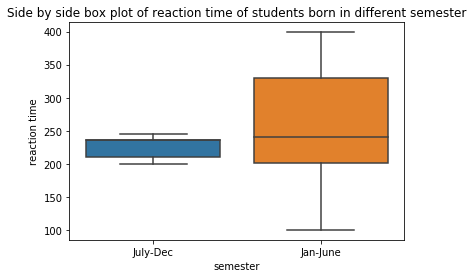

In [136]:
import seaborn as sns
# get sample size and sample mean
ax = sns.boxplot(x="semester", y="reaction time", data=data)
ax.set_title("Side by side box plot of reaction time of students born in different semester");

I suspect that there is a difference in the reaction time from the box plots. I further do a randomization test. 

$H_0:$ the mean reaction time of students born in different semesters are equal

$H_a:$ the mean reaction time of students born in different semesters are not equal

In [137]:
from scipy.special import comb
from itertools import combinations

# get sample size and sample mean
a = data.loc[data['semester']=='July-Dec']['reaction time']
b = data.loc[data['semester']=='Jan-June']['reaction time']

size = len(data)
size_a = len(a)
obsdiff = a.mean()- b.mean()


# permutation
a = np.arange(size).tolist()
index = [i for i in combinations(a,5)]

pooled = np.concatenate((a,b)) 
N = comb(size, size_a, exact = True)
rand_dist = np.zeros(N) #numpy array to store values

for i in range(N):
    x1 = [pooled[j] for j in index[i]]
    x2 = [pooled[j] for j in a if j not in index[i]]
    d = np.mean(x1)-np.mean(x2)
    rand_dist[i] = d

# get p-value
tbar = rand_dist.mean()
p_value2 = (sum(np.absolute(rand_dist - tbar) >= 
                np.absolute(obsdiff - tbar))/N)
print('The two-sided p-value is:', p_value2)

The two-sided p-value is: 0.0


Based on the obtained P-value (0.0), we can reject the null hypothesis. Therefore, there is some evidence suggesting that students born in the Fall-Winter term have different reaction times compared to Spring-Summer students.

(b) We will do a histogram to examine the distributions of the student's favorite movie genres. 

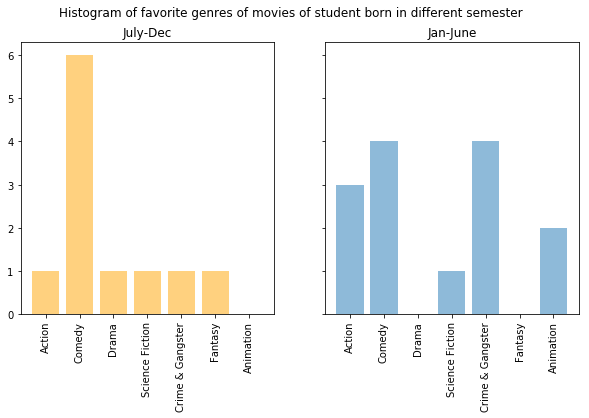

In [138]:
# get all genres
allgenres = []
for i in data['movie genres'].dropna():
    allgenres += i
allgenres = [i for i in set(allgenres)]
fall = np.repeat(0, len(allgenres))
winter = np.repeat(0, len(allgenres))
for i in data.loc[data['semester']=="July-Dec"]['movie genres'].dropna():
    for g in i:
        fall[allgenres.index(g)] += 1
for i in data.loc[data['semester']=="Jan-June"]['movie genres'].dropna():
    for g in i:
        winter[allgenres.index(g)] += 1
fig, axs = plt.subplots(1,2, sharey=True, figsize=(10,5))
fig.suptitle("Histogram of favorite genres of movies of student born in different semester")
axs[0].bar(allgenres, fall, alpha=0.5, color="orange")
axs[0].set_xticklabels(allgenres, rotation=90)
axs[0].set_title("July-Dec")
axs[1].bar(allgenres, winter, alpha=0.5)
axs[1].set_xticklabels(allgenres, rotation=90)
axs[1].set_title("Jan-June");

Based on the histogram, we observe that the distribution for the two groups are quite different. Therefore,students born in the Fall-Winter term have different movie preferences compared to Spring-Summer students.

This investigation is very limited since the sample size is too small, and there are many genres. There is a very high probability that the observed difference is just a coincidence. 

(c) I'll use two sample t-test. 

Null hypothesis: Students who ate a candy within 10 min before the test has the same mean reaction time to those who didn't.

Alternative hypothesis: Students who ate a candy within 10 min before the test has a smaller mean reaction time to those who didn't.

$H_0:\mu_a=\mu_b$ where $\mu_a$ is the mean reaction time of students who ate candy, $\mu_b$ is the mean reaction time of students who did not. 

$H_a: \mu_a > \mu_b$




In [139]:
from scipy import stats
tstat, pvalue = stats.ttest_ind(data.loc[data['candy']]['reaction time'], data.loc[data['candy'] != True]['reaction time'])
print(' The t-statistic is:', np.round(tstat,3), '\n', 'The P-value is:', np.round(pvalue/2,3))

 The t-statistic is: -0.474 
 The P-value is: 0.322


By the result of two sample t-test, the p value is 0.322 > 0.05. We cannot reject the null hypothesis that students who ate a candy within 10 min before the test has the same mean reaction time to those who didn't. Therefore, we have no evidence that students who ate a candy within 10min before the time reaction test perform better at the test.

Because the sample size is small, we cannot make sure that the samples are independent random samples from a normal distribution and has the same variance. Therefore, the test result is limited and may not be very significant. 